In [1]:
pip install groq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.1/109.1 kB 4.8 MB/s eta 0:00:00


In [2]:
pip install langchain-groq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 411.6/411.6 kB 10.0 MB/s eta 0:00:00
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.25
    Uninstalling langchain-core-0.3.25:
      Successfully uninstalled langchain-core-0.3.25


In [3]:
pip install python-dotenv

In [4]:
import os

In [5]:
with open('/content/.env', 'w') as f:
    f.write('GROQ_API_KEY=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')
print("`.env` file created successfully!")


`.env` file created successfully!


In [6]:
from dotenv import load_dotenv
load_dotenv()

True

In [7]:
from groq import Groq

In [8]:
client = Groq(api_key=os.getenv("GROQ_API_KEY"))

In [9]:
from langchain_groq import ChatGroq

In [10]:
llm = ChatGroq(model_name="llama3-70b-8192")

In [11]:
from langchain.agents.agent_types import AgentType

In [12]:
pip install langchain-experimental

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.2/209.2 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 49.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 45.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 kB 3.7 MB/s eta 0:00:00
  Attempting uninstall: langchain
    Found existing installation: langchain 0.3.12
    Uninstalling langchain-0.3.12:
      Successfully uninstalled langchain-0.3.12


In [13]:
from langchain_experimental.agents.agent_toolkits import create_pandas_dataframe_agent

In [14]:
import pandas as pd

In [15]:
df = pd.read_csv('/content/healthcare_dataset.csv')

In [16]:
df.shape

(55500, 15)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [18]:
df.describe()

,Age,Billing Amount,Room Number
count,55500.000000,55500.000000,55500.000000
mean,51.539459,25539.316097,301.134829
std,19.602454,14211.454431,115.243069
min,13.000000,-2008.492140,101.000000
25%,35.000000,13241.224652,202.000000
50%,52.000000,25538.069376,302.000000
75%,68.000000,37820.508436,401.000000
max,89.000000,52764.276736,500.000000


In [19]:
agent = create_pandas_dataframe_agent(llm, df, verbose=True, allow_dangerous_code=True)

In [20]:
result = agent.invoke('give me the insights about the data')



> Entering new AgentExecutor chain...
Thought: Let's get an overview of the dataframe to understand the structure and data types of each column.

Action: python_repl_ast
Action Input: df.info()<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Disch

In [21]:
print(result['output'])

The insights about the data are:

* The dataframe has 55,500 rows and 15 columns, with a mix of data types including object, int64, and float64.
* The statistical summary shows that the mean age is around 51, with a standard deviation of 19. The billing amount has a mean of around 25,539, with a standard deviation of 14,211.
* There are 49,992 unique names, 77 unique ages, 2 unique genders, 8 unique blood types, and so on.
* The data has a significant number of unique values in columns such as Doctor, Hospital, and Date of Admission, indicating a diverse range of values in these columns.

Overall, these insights provide a general understanding of the structure and characteristics of the data.


In [ ]:
result=agent.invoke('give me the info from twenty sixth row')



> Entering new AgentExecutor chain...
Thought: I need to access a specific row in the dataframe.

Action: python_repl_ast
Action Input: `df.iloc[25]`Name                  PeTER fiTzgeRaLd
Age                                 73
Gender                            Male
Blood Type                         AB+
Medical Condition              Obesity
Date of Admission           2020-05-15
Doctor                Angela Contreras
Hospital                 Garner-Bowman
Insurance Provider            Medicare
Billing Amount            19746.832008
Room Number                        162
Admission Type                  Urgent
Discharge Date              2020-05-20
Medication                     Aspirin
Test Results                  Abnormal
Name: 25, dtype: objectIt looks like I got the information from the 26th row (index 25) of the dataframe. 

Final Answer: The information from the 26th row is: Name: PeTER fiTzgeRaLd, Age: 73, Gender: Male, Blood Type: AB+, Medical Condition: Obesity, Date of Admi

In [ ]:
result=agent.invoke('what will you conclude about the data')



> Entering new AgentExecutor chain...
Thought: Let's get an overview of the data by checking the data types and summary statistics.

Action: python_repl_ast
Action Input: `df.info()`<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date  

In [ ]:
result['output']

'Based on the data, we can conclude that the dataset contains information about patients in a hospital, with 15 columns representing various attributes such as patient demographics, medical conditions, hospital information, and billing details. The dataset has 55,500 rows, indicating a large number of patients. The data types of the columns are a mix of integers, floats, and objects, with most columns being objects (strings). The summary statistics of the numerical columns (Age, Billing Amount, and Room Number) show that the average age is around 51, the average billing amount is around 25,539, and the average room number is around 301. There are some outliers in the data, as indicated by the minimum and maximum values. Overall, the data appears to be a comprehensive dataset for hospital patient information.'



> Entering new AgentExecutor chain...
Thought: To identify outliers, I need to explore the distribution of each column in the dataset. I'll start by checking the numerical columns.

Action: python_repl_ast
Action Input: df.describe()                Age  Billing Amount   Room Number
count  55500.000000    55500.000000  55500.000000
mean      51.539459    25539.316097    301.134829
std       19.602454    14211.454431    115.243069
min       13.000000    -2008.492140    101.000000
25%       35.000000    13241.224652    202.000000
50%       52.000000    25538.069376    302.000000
75%       68.000000    37820.508436    401.000000
max       89.000000    52764.276736    500.000000From the output of `df.describe()`, I can see that the distribution of `Age`, `Billing Amount`, and `Room Number` seems reasonable, with no obvious outliers. The minimum and maximum values for these columns are within expected ranges.

Action: python_repl_ast
Action Input: df['Billing Amount'].plot.box()Axes(0.125,

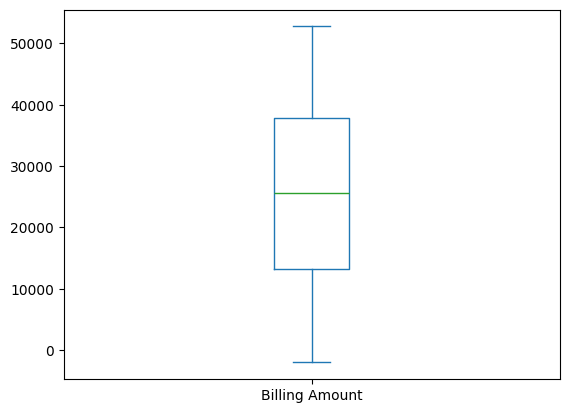

In [ ]:
result = agent.invoke('Are there any outliers in the dataset?')
print(result['output'])



> Entering new AgentExecutor chain...
Thought: I need to create a heatmap to visualize the correlation between Billing Amount and Age. I can use the seaborn library to create the heatmap.

Action: python_repl_ast
Action Input: import seaborn as sns; import matplotlib.pyplot as plt; sns.set()Now I have the necessary libraries imported. Next, I need to create the heatmap.

Action: python_repl_ast
Action Input: plt.figure(figsize=(10,8)); sns.heatmap(df[['Age', 'Billing Amount']].corr(), annot=True, cmap='coolwarm', linewidths=0.5)Axes(0.125,0.11;0.62x0.77)I now know the final answer.

Final Answer: The code to create a heatmap showing the correlation between Billing Amount and age is:

```
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
plt.figure(figsize=(10,8))
sns.heatmap(df[['Age', 'Billing Amount']].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()
```

Note: I added `plt.show()` to display the heatmap.

> Finished chain.
The code to create a heatmap 

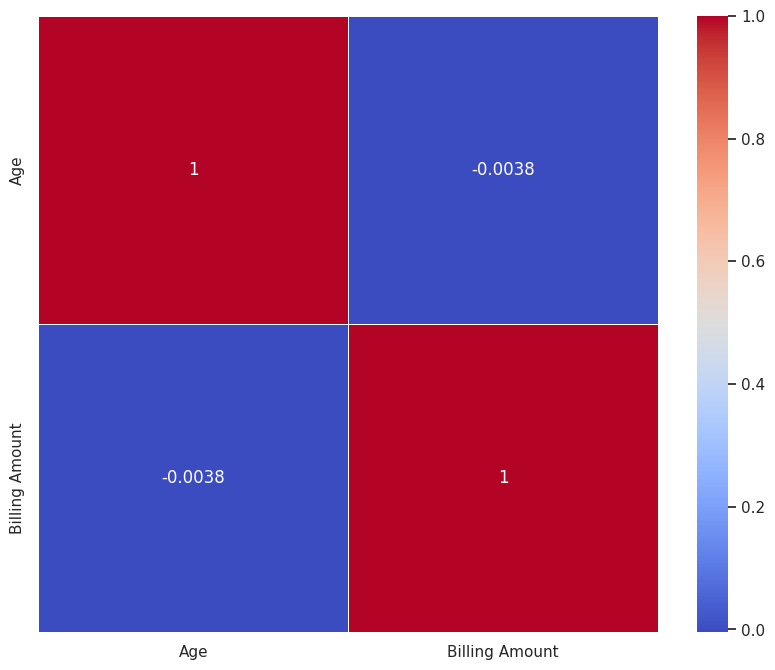

In [ ]:
result = agent.invoke('Can you create a heatmap showing the correlation between Billing Amount and age?')
print(result['output'])
